In [195]:
# Problem : Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir.
# Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.


# Telco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan
# hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.


# 21 Değişken 7043 Gözlem

In [196]:
# CustomerId : Müşteri İd’si
# Gender : Cinsiyet
# SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
# Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
# Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
# tenure : Müşterinin şirkette kaldığı ay sayısı
# PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
# MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
# InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
# OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
# StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
# Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
# PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
# PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
# MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges : Müşteriden tahsil edilen toplam tutar
# Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler

In [197]:
# Her satır benzersiz bir müşteriyi temsil etmekte.
# Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.
# Müşterilerin kaydolduğu hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
# Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
# Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı

In [198]:
import joblib
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [199]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [200]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [201]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [202]:
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

In [203]:
# Exploratory Data Analysis

In [204]:
# Dataframe'i hızlı bir şekilde göz atmamızı sağlayan fonksiyon
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [205]:
# Kategorik değişkenlerin sınıf frekansı ve oranını gözlemleyelim
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [206]:
# Sayısal değişkenleri özetleme fonksiyonunu yazalım
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


In [207]:
# Bağımlı değişkeni sayısal değişkenler ile özetleme
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [208]:
# Bağımlı değişkeni kategorik değişkenler ile özetleme
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [209]:
# Korelasyon matrisini oluşturalım
# Veri setlerini içindeki sayısal değişkenlerin birbirleri arasındaki
# korelasyonu hesaplayacak ve bunu ısı haritası yardımıyla görselleştirecek

In [210]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [211]:
# Kategorik değişkenleri, sayısal değişkenleri ve kategorik gibi görünen kardinal değişkenleri veren fonksiyon

In [212]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [213]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [214]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [216]:
# TotalCharges sayısal bir değişken olmalı
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
# Churn değişkenini Yes-No yerine 1-0 olarak yapalım
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [220]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling          

In [221]:
# Değişken türlerinin ayrıştırılması
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [222]:
# Kategorik değişkenlerin incelenmesi
for col in cat_cols:
  cat_summary(df, col)

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################
         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################
            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################
              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################
                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################
                 InternetService      Ratio
InternetService               

In [223]:
# Sayısal değişkenlerin incelenmesi
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


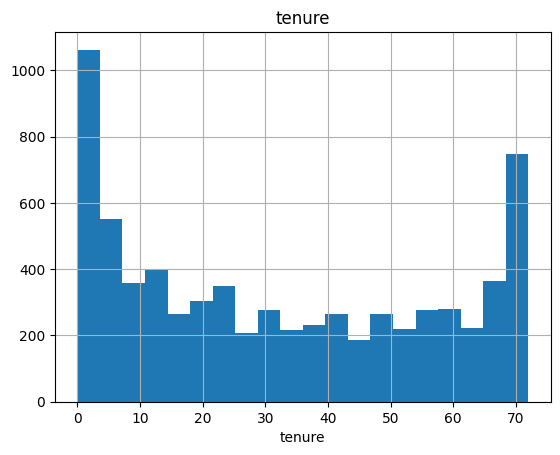

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


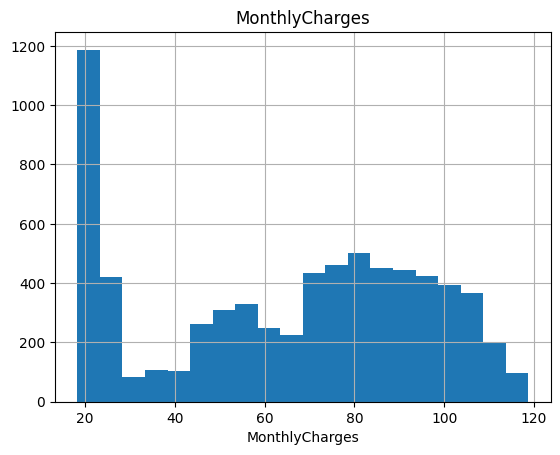

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


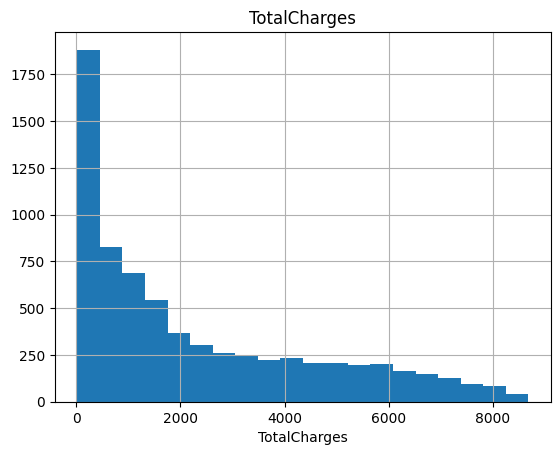

In [224]:
# Sayısal değişkenlerin grafiği
for col in num_cols:
  num_summary(df, col,plot=True)

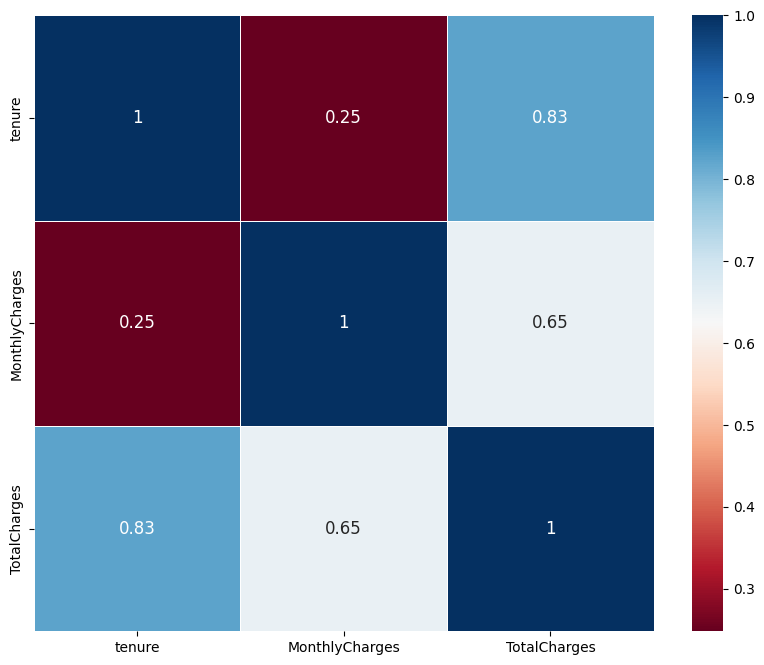

In [225]:
# Sayısal değişkenlerin birbiri ile korelasyonu
correlation_matrix(df, num_cols)

In [226]:
# Target ile sayısal değişkenlerin incelenmesi
for col in num_cols:
  target_summary_with_num(df, "Churn", col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




In [227]:
# Data Preprocessing & Feature Engineering

In [228]:
# Eksik değer varsa eksik değerlerin toplamını ve oranını yazdıran fonksiyon
def missing_values_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df, end="\n")

  if na_name:
    return na_columns


na_columns = missing_values_table(df, True)

              n_miss  ratio
TotalCharges      11   0.16


In [229]:
df.loc[df["TotalCharges"].isnull()]  # Bu veriler eksikte neden eksik şöyle bir bakalım veri setimize
# Bu değerlerin eksik olanların hepsinin tenure 'ları sıfır.
# Bu insanlar bizim daha yeni müşterimiz olmuş. O yüzden daha fatura ödememişler.
# Biz burda bunları silmeye gitsek burada ki anlamı kaçıracaktık.
# Eksikliklerin aykırılıkların kendi içinde anlamları olabilir.
# O yüzden eksiklikleri de aykırılıklarıda incelememiz gerekiyor.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [230]:
# Biz bu ay sonunda nasıl olsa parayı alacağız. O yüzden direkt MonthlyCharges ile doldurmakta mantıklı.
df.loc[df["TotalCharges"].isnull(), "TotalCharges"] = df.loc[df["TotalCharges"].isnull(), "MonthlyCharges"]

In [231]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [232]:
# Burada yine kendi istediğimiz doğrultusunda yorum yapıyoruz. Şöyle:
# Tenure sıfır olamaz yani müşteri sıfır aylık olamaz. O yüzden +1 ekliyoruz.
df["tenure"] = df["tenure"] + 1
df[df["tenure"] == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,0
753,3115-CZMZD,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,0
936,5709-LVOEQ,Female,0,Yes,Yes,1,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,0
1082,4367-NUYAO,Male,0,Yes,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,0
1340,1371-DWPAZ,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,0
3331,7644-OMVMY,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,0
3826,3213-VVOLG,Male,0,Yes,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,0
4380,2520-SGTTA,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,0
5218,2923-ARZLG,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,0
6670,4075-WKNIU,Female,0,Yes,Yes,1,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,0


In [233]:
# Eşik değer belirleme fonksiyonu (Boxplot - IQR Yöntemi)
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [234]:
# Aykırı değerleri baskılama yöntemi
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [235]:
# Aykırı değer var mı yok mu diye sorgulama fonksiyonu
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return

In [236]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
  return dataframe

In [237]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,2,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,35,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,3,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,46,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [238]:
# Yeni değişkenler üretelim
# Tenure değişkeninden yıllık kategorik değişken oluşturun
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [239]:
# Kontratı 1 veya 2 yıllık müşterilerin Engegad olark belirtme
df["NEW_Engaged"] =df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

In [240]:
# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [241]:
# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x:1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [242]:
# Kişinin toplam aldığı servis sayısı
df["NEW_TotalServices"] = (df[["PhoneService", "InternetService", "OnlineSecurity",
                               "OnlineBackup", "DeviceProtection", "TechSupport",
                               "StreamingTV", "StreamingMovies"]] == "Yes").sum(axis=1)

In [243]:
# Herhang bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [244]:
# Ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / df["tenure"]

In [245]:
# Güncel fiyatın ortalama fiyatına göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [246]:
# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df["NEW_TotalServices"] + 1)

In [247]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,2,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year,0,1,1,1,0,14.925000,0.500000,14.9250
1,5575-GNVDE,Male,0,No,No,35,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Year,1,1,0,3,0,53.985714,0.947949,14.2375
2,3668-QPYBK,Male,0,No,No,3,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year,0,1,1,3,0,36.050000,0.669452,13.4625
3,7795-CFOCW,Male,0,No,No,46,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Year,1,1,0,3,0,40.016304,0.946012,10.5750
4,9237-HQITU,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year,0,1,1,1,0,50.550000,0.714993,35.3500


In [248]:
cat_cols , num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

Observations: 7043
Variables: 30
cat_cols: 22
num_cols: 7
cat_but_car: 1
num_but_cat: 6


In [249]:
for col in cat_cols:
  cat_summary(df, col)

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################
         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################
            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################
              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################
                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################
                 InternetService      Ratio
InternetService               

In [250]:
for col in cat_cols:
  target_summary_with_cat(df, "Churn", col)

        TARGET_MEAN
gender             
Female     0.269209
Male       0.261603


         TARGET_MEAN
Partner             
No          0.329580
Yes         0.196649


            TARGET_MEAN
Dependents             
No             0.312791
Yes            0.154502


              TARGET_MEAN
PhoneService             
No               0.249267
Yes              0.267096


                  TARGET_MEAN
MultipleLines                
No                   0.250442
No phone service     0.249267
Yes                  0.286099


                 TARGET_MEAN
InternetService             
DSL                 0.189591
Fiber optic         0.418928
No                  0.074050


                     TARGET_MEAN
OnlineSecurity                  
No                      0.417667
No internet service     0.074050
Yes                     0.146112


                     TARGET_MEAN
OnlineBackup                    
No                      0.399288
No internet service     0.074050
Yes                     0.2153

In [251]:
# Bağımlı değişkeni kategorik değişken listesinden çıkaralım. Çünkü makine öğrenmesine doğru gidiyorum
cat_cols = [col for col in cat_cols if "Churn" not in col]

In [252]:
# Kategorik değişkenleri makine öğrenimi için standartlaştırma
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
  return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [253]:
# Dataframe deki tüm True/False sütunlarını 0 ve 1 yapma
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [254]:
check_df(df)

##################### Shape #####################
(7043, 45)
##################### Types #####################
customerID                                object
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
NEW_TotalServices                          int64
NEW_AVG_Charges                          float64
NEW_Increase                             float64
NEW_AVG_Service_Fee                      float64
gender_Male                                int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineS

In [255]:
for col in num_cols:
  print(col, check_outlier(df, col, 0.05, 0.95))

tenure None
MonthlyCharges None
TotalCharges None
NEW_TotalServices None
NEW_AVG_Charges None
NEW_Increase None
NEW_AVG_Service_Fee None


In [256]:
# Standartlaşma
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)  # scale sonrası dönen numpy arrayini isimlendirerek dataframe yapıyoruz

In [257]:
y = df["Churn"]
X = df.drop(["Churn"], axis = 1)

In [258]:
# Tüm işlemleri şimdi tek bir fonksiyon altında yazalım

In [259]:
def churn_data_prep(dataframe):
    # Tenure değişkeninden yıllık kategorik değişken oluşturun
    dataframe.loc[(dataframe["tenure"]>=0) & (dataframe["tenure"]<=12), "NEW_TENURE_YEAR"] = "0-1 Year"
    dataframe.loc[(dataframe["tenure"]>12) & (dataframe["tenure"]<=24), "NEW_TENURE_YEAR"] = "1-2 Year"
    dataframe.loc[(dataframe["tenure"]>24) & (dataframe["tenure"]<=36), "NEW_TENURE_YEAR"] = "2-3 Year"
    dataframe.loc[(dataframe["tenure"]>36) & (dataframe["tenure"]<=48), "NEW_TENURE_YEAR"] = "3-4 Year"
    dataframe.loc[(dataframe["tenure"]>48) & (dataframe["tenure"]<=60), "NEW_TENURE_YEAR"] = "4-5 Year"
    dataframe.loc[(dataframe["tenure"]>60) & (dataframe["tenure"]<=72), "NEW_TENURE_YEAR"] = "5-6 Year"

    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

    df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

    df.loc[df["TotalCharges"].isnull(), "TotalCharges"] = df.loc[df["TotalCharges"].isnull(), "MonthlyCharges"]

    # Kontratı 1 veya 2 yıllık müşterilerin Engaged olarak belirtme
    dataframe["NEW_Engaged"] = dataframe["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

    # Herhangi bir destek, yedek veya koruma almayan kişiler
    dataframe["NEW_noProt"] = dataframe.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

    # Aylık sözleşmesi bulunan ve genç olan müşteriler
    dataframe["NEW_Young_Not_Engaged"] = dataframe.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

    # Kişinin toplam aldığı servis sayısı
    dataframe["NEW_TotalServices"] = (dataframe[["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]] == "Yes").sum(axis=1)

    # Herhangi bir streaming hizmeti alan kişiler
    dataframe["NEW_FLAG_ANY_STREAMING"] = dataframe.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

    df["tenure"] = df["tenure"] + 1

    # Ortalama aylık ödeme
    dataframe["NEW_AVG_Charges"] = dataframe["TotalCharges"] / dataframe["tenure"]

    # Güncel fiyatın ortalama fiyatına göre artışı
    dataframe["NEW_Increase"] = dataframe["NEW_AVG_Charges"] / dataframe["MonthlyCharges"]

    # Servis başına ücret
    dataframe["NEW_AVG_Service_Fee"] = dataframe["MonthlyCharges"] / (dataframe["NEW_TotalServices"] + 1)

    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe, cat_th=5, car_th=20)

    df.loc[df["TotalCharges"].isnull(), "TotalCharges"] = df.loc[df["TotalCharges"].isnull(), "MonthlyCharges"]

    for col in num_cols:
      print(col, check_outlier(df, col))
    if check_outlier(df, col):
      replace_with_thresholds(df, col)

    cat_cols = [col for col in cat_cols if "Churn" not in col]

    dataframe = one_hot_encoder(dataframe, cat_cols, drop_first=True)

    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe, cat_th=5, car_th=20)

    X_scaled = StandardScaler().fit_transform(dataframe[num_cols])
    dataframe[num_cols] = pd.DataFrame(X_scaled, columns=dataframe[num_cols].columns)
    dataframe = dataframe.applymap(lambda x: int(x) if isinstance(x, bool) else x)

    y = dataframe["Churn"]
    X = dataframe.drop(["Churn"], axis=1)

    return X, y


In [260]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [261]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling          

In [262]:
X, y = churn_data_prep(df)

Observations: 7043
Variables: 30
cat_cols: 22
num_cols: 7
cat_but_car: 1
num_but_cat: 6
tenure None
MonthlyCharges None
TotalCharges None
NEW_TotalServices None
NEW_AVG_Charges None
NEW_Increase True
NEW_AVG_Service_Fee True
Observations: 7043
Variables: 45
cat_cols: 37
num_cols: 7
cat_but_car: 1
num_but_cat: 37


In [263]:
check_df(X)

##################### Shape #####################
(7043, 44)
##################### Types #####################
customerID                                object
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
NEW_TotalServices                        float64
NEW_AVG_Charges                          float64
NEW_Increase                             float64
NEW_AVG_Service_Fee                      float64
gender_Male                                int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineB

In [264]:
X = X.drop(["customerID"], axis=1)

In [265]:
check_df(y)

##################### Shape #####################
(7043,)
##################### Types #####################
int64
##################### Head #####################
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
##################### Tail #####################
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, dtype: int64
##################### NA #####################
0


In [266]:
######################################################
# Base Models
######################################################

In [267]:
# Bir fonksiyon tanımayalım. Fonksiyonun bir argümanı bağımsız değişkenler , diğer argümanı bağımlı değişken, scoring argümanı da ilgili
# test istatistiği olarak roc_auc var. Bütün modellere fikrini sormak istiyoruz.

In [268]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   #('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [269]:
print(y.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [270]:
base_models(X, y, scoring="accuracy")

Base Models....
accuracy: 0.8046 (LR) 
accuracy: 0.7733 (KNN) 
accuracy: 0.8001 (SVC) 
accuracy: 0.7338 (CART) 
accuracy: 0.7894 (RF) 
accuracy: 0.7948 (Adaboost) 
accuracy: 0.8012 (GBM) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1246, number of negative: 3449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1430
[LightGBM] [Info] Number of data points in the train set: 4695, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265389 -> initscore=-1.018146
[LightGBM] [Info] Start training from score -1.018146
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1246, number of negative: 3449
[LightGBM] [Info] Auto-choos

In [271]:
######################################################
# Automated Hyperparameter Optimization
######################################################

In [272]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               #('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]


In [273]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [274]:
best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.7833
roc_auc (After): 0.8384
KNN best params: {'n_neighbors': 49}

########## CART ##########
roc_auc (Before): 0.6546
roc_auc (After): 0.8243
CART best params: {'max_depth': 5, 'min_samples_split': 10}

########## RF ##########
roc_auc (Before): 0.8226
roc_auc (After): 0.844
RF best params: {'max_depth': 8, 'max_features': 7, 'min_samples_split': 20, 'n_estimators': 200}

########## LightGBM ##########
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1246, number of negative: 3449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1430
[LightGBM] [Info] Number of data points in the train set: 4695, number of used features: 43
[LightGBM] [In

In [275]:
######################################################
# 5. Stacking & Ensemble Learning
######################################################

In [276]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")

    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

In [277]:
voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1430
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1246, number of negative: 3449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you 

In [278]:
######################################################
# Prediction for a New Observation
######################################################

In [279]:
X.columns  # Değişkenlerimiz

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'NEW_TotalServices', 'NEW_AVG_Charges', 'NEW_Increase', 'NEW_AVG_Service_Fee', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'NEW_TENURE_YEAR_1-2 Year', 'NEW_TENURE_YEAR_2-3 Year', 'NEW_TENURE_YEAR_3-4 Year', 'NEW_TENURE_YEAR_4-5 Year', 'NEW_TENURE_YEAR_5-6 Year',
       'SeniorCitizen_1', 

In [280]:
random_user = X.sample(1, random_state=45)
print(random_user)

        tenure  MonthlyCharges  TotalCharges  NEW_TotalServices  NEW_AVG_Charges  NEW_Increase  NEW_AVG_Service_Fee  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
5851  0.107048        1.530126      0.686721           2.201428         1.557161      0.419987            -0.470138            0            0               0                 1                               0                  1                            1                   0                                   0                   1                                 0                 1                                     0                     1                                0                1   

     

In [281]:
voting_clf.predict(random_user)

array([0])